# Understanding Data and Data Preprocessing



In [1]:
import pandas as pd #Importing python libraries for data analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
import researchpy as rp


import warnings
warnings.filterwarnings("ignore")

hotel_lisbon = pd.read_csv('HotelLisbon-Sampled.csv') #Reading csv file and making dataframe 'hotel_lisbon'

hotel_lisbon = hotel_lisbon.drop(['ArrivalDateYear','ArrivalDateMonthCode','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','ArrivalDayCode','IsRepeatedGuest','Country','StaysInWeekendNights','StaysInWeekNights','ReservationStatus','ReservationStatusDate','ArrivalDay','ReservedRoomType','DistributionChannel','Company'],axis=1) #Dropping columns not required for analysis

hotel_lisbon.head(10) #Initial records of dataframe

,LeadTime,ArrivalDateMonth,StaysInNights,Adults,Children,Babies,Meal,CountryPRT,MarketSegment,PreviousCancellations,...,AssignedRoomType,BookingChanges,Deposit,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,IsCanceled
0,192.0,December,4.0,2.0,0.0,0.0,SC,0.0,Online TA,0.0,...,A,2.0,0.0,9,0.0,Transient,72.75,0.0,2.0,0
1,23.0,October,1.0,3.0,0.0,NaN,BB,0.0,Offline TA/TO,0.0,...,A,1.0,0.0,118,0.0,Transient,119.40,0.0,1.0,0
2,17.0,February,2.0,3.0,0.0,0.0,BB,0.0,Online TA,0.0,...,A,0.0,0.0,9,0.0,Transient,136.00,0.0,NaN,1
3,19.0,August,2.0,1.0,0.0,0.0,SC,0.0,Online TA,0.0,...,A,0.0,0.0,9,0.0,Transient,160.00,0.0,NaN,0
4,4.0,February,2.0,2.0,0.0,0.0,BB,0.0,Direct,0.0,...,E,0.0,0.0,No Agent,0.0,Transient,127.00,0.0,0.0,0
5,192.0,September,4.0,2.0,0.0,0.0,BB,0.0,Online TA,0.0,...,A,0.0,0.0,9,0.0,Transient,107.10,0.0,2.0,0
6,NaN,September,3.0,2.0,0.0,0.0,BB,1.0,Groups,0.0,...,A,0.0,NaN,37,0.0,Transient,120.00,0.0,0.0,1
7,213.0,August,4.0,NaN,0.0,0.0,SC,0.0,Online TA,0.0,...,A,0.0,0.0,9,0.0,Transient,80.75,0.0,0.0,1
8,175.0,May,3.0,2.0,0.0,0.0,BB,1.0,Groups,0.0,...,A,0.0,1.0,12,0.0,Transient,110.00,0.0,0.0,1
9,145.0,August,3.0,NaN,0.0,0.0,HB,0.0,Offline TA/TO,0.0,...,A,1.0,NaN,17,0.0,Transient-Party,72.50,0.0,0.0,0


In [2]:
print(hotel_lisbon.shape) #No. of rows and columns of dataframe

print(hotel_lisbon.info()) #Data type of each column along with number of non null values

def unique(): #Defined unique() to give number of unique values of each column in dataframe
    columns=[] #List to store the names of all the columns in dataframe
    uniques=[] #List to store the number of unique values of all the columns in dataframe
    
    for col in hotel_lisbon.columns: 
        columns.append(col)
        uniques.append(hotel_lisbon[col].nunique())
    unique_data={'Column Name':columns,'Number of Unique Values':uniques}
    unique_df = pd.DataFrame(unique_data)
    return unique_df #Dataframe that gives you the name of the column along with the number of unique values

print(unique()) #Calling unique()

(2993, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 21 columns):
LeadTime                       2850 non-null float64
ArrivalDateMonth               2846 non-null object
StaysInNights                  2849 non-null float64
Adults                         2831 non-null float64
Children                       2857 non-null float64
Babies                         2867 non-null float64
Meal                           2835 non-null object
CountryPRT                     2832 non-null float64
MarketSegment                  2851 non-null object
PreviousCancellations          2851 non-null float64
PreviousBookingsNotCanceled    2855 non-null float64
AssignedRoomType               2842 non-null object
BookingChanges                 2853 non-null float64
Deposit                        2871 non-null float64
Agent                          2836 non-null object
DaysInWaitingList              2857 non-null float64
CustomerType                   2853 non

In [3]:
print(hotel_lisbon.describe()) #Summary statistics of numeric columns (int64,float64) before dealing with missing values

          LeadTime  StaysInNights       Adults     Children       Babies  \
count  2850.000000    2849.000000  2831.000000  2857.000000  2867.000000   
mean    109.700702       2.911197     1.867891     0.087854     0.004186   
std     109.661238       1.624787     0.494704     0.363297     0.064572   
min       0.000000       1.000000     1.000000     0.000000     0.000000   
25%      23.000000       2.000000     2.000000     0.000000     0.000000   
50%      76.000000       3.000000     2.000000     0.000000     0.000000   
75%     162.750000       4.000000     2.000000     0.000000     0.000000   
max     629.000000      15.000000     3.000000     3.000000     1.000000   

        CountryPRT  PreviousCancellations  PreviousBookingsNotCanceled  \
count  2832.000000            2851.000000                  2855.000000   
mean      0.384181               0.086286                     0.147110   
std       0.486487               0.593761                     2.072462   
min       0.000000 

In [4]:
print(hotel_lisbon.describe(include='O')) #Summary statistics of object columns (object) before dealing with missing values

       ArrivalDateMonth       Meal MarketSegment  AssignedRoomType Agent  \
count              2846       2835          2851              2842  2836   
unique               12          3             7                 8   115   
top                 May  BB            Online TA  A                    9   
freq                344       2217          1406              2033  1156   

       CustomerType  
count          2853  
unique            4  
top       Transient  
freq           2129  


In [5]:
print(rp.summary_cat(hotel_lisbon['IsCanceled'])) #Frequency and percentage distribution of 'IsCanceled' - target column using researchpy
print('\nIsCanceled column is our target column that we want to predict.The dataset is not balanced but is not very imbalanced as well.')

     Variable  Outcome  Count  Percent
0  IsCanceled        0   1752    58.54
1                    1   1241    41.46

IsCanceled column is our target column that we want to predict.The dataset is not balanced but is not very imbalanced as well.


# Handling Missing Values


In [6]:
#Number of missing values of each column in dataframe
print(hotel_lisbon.isnull().sum())

LeadTime                       143
ArrivalDateMonth               147
StaysInNights                  144
Adults                         162
Children                       136
Babies                         126
Meal                           158
CountryPRT                     161
MarketSegment                  142
PreviousCancellations          142
PreviousBookingsNotCanceled    138
AssignedRoomType               151
BookingChanges                 140
Deposit                        122
Agent                          157
DaysInWaitingList              136
CustomerType                   140
ADR                            167
RequiredCarParkingSpaces       141
TotalOfSpecialRequests         142
IsCanceled                       0
dtype: int64


In [7]:
#Imputing missing values of Continuous Numeric columns with either mean filling or median filling depending on the skewness
for col in ['LeadTime','StaysInNights','PreviousCancellations','BookingChanges','TotalOfSpecialRequests','PreviousBookingsNotCanceled','ADR','DaysInWaitingList']:
    if -0.7<=hotel_lisbon[col].skew()<=0.7:
        hotel_lisbon[col]=hotel_lisbon[col].fillna(round(hotel_lisbon[col].mean()))
    else:
        hotel_lisbon[col]=hotel_lisbon[col].fillna(round(hotel_lisbon[col].median()))

print('Done imputing missing values of Continuous Numeric columns.')

Done imputing missing values of Continuous Numeric columns.


In [8]:
#Imputing missing values of Categorical columns with mode filling
for col in ['Adults','Children','Babies','CountryPRT','Deposit','MarketSegment','CustomerType','ArrivalDateMonth','Meal','RequiredCarParkingSpaces','AssignedRoomType','Agent']:
    hotel_lisbon[col]=hotel_lisbon[col].fillna(hotel_lisbon[col].mode()[0])
    
print('Done imputing missing values of Categorical Numeric columns.')

Done imputing missing values of Categorical Numeric columns.


In [9]:
print(hotel_lisbon.isnull().sum()) #Handled missing values of all those columns that might be needed for ML modeling

LeadTime                       0
ArrivalDateMonth               0
StaysInNights                  0
Adults                         0
Children                       0
Babies                         0
Meal                           0
CountryPRT                     0
MarketSegment                  0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
AssignedRoomType               0
BookingChanges                 0
Deposit                        0
Agent                          0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
IsCanceled                     0
dtype: int64


In [10]:
print(hotel_lisbon.describe()) #Summary statistics of numeric columns (int64,float64) after dealing with missing values
print('\n')
print(hotel_lisbon.describe(include=['O'])) #Summary statistics of object columns (object) after dealing with missing values

          LeadTime  StaysInNights       Adults     Children       Babies  \
count  2993.000000    2993.000000  2993.000000  2993.000000  2993.000000   
mean    108.090545       2.915469     1.875042     0.083862     0.004009   
std     107.249815       1.585320     0.482053     0.355416     0.063203   
min       0.000000       1.000000     1.000000     0.000000     0.000000   
25%      26.000000       2.000000     2.000000     0.000000     0.000000   
50%      76.000000       3.000000     2.000000     0.000000     0.000000   
75%     158.000000       4.000000     2.000000     0.000000     0.000000   
max     629.000000      15.000000     3.000000     3.000000     1.000000   

        CountryPRT  PreviousCancellations  PreviousBookingsNotCanceled  \
count  2993.000000            2993.000000                  2993.000000   
mean      0.363515               0.082192                     0.140327   
std       0.481092               0.579790                     2.024339   
min       0.000000 

# Exploratory Data Analysis, Feature Engineering and Statistical Testing

In [11]:
#Feature Engineering RequiredCarParkingSpaces to make it binary - numeric column with '1' indicating 'requires car parking space' and '0' indicating 'doesn't require car parking space'
#Feature Engineering Babies to make it binary - numeric column with '1' indicating 'baby present' and '0' indicating 'baby absent'
#Feature Engineering Children to make it binary - numeric column with '1' indicating 'atleast one child' and '0' indicating 'no children'
for col in ['RequiredCarParkingSpaces','Babies','Children']:
    hotel_lisbon[col]=[0 if item==0 else 1 for item in hotel_lisbon[col]]
    print(hotel_lisbon[col].value_counts())
    print('\n')

0    2912
1      81
Name: RequiredCarParkingSpaces, dtype: int64


0    2981
1      12
Name: Babies, dtype: int64


0    2814
1     179
Name: Children, dtype: int64




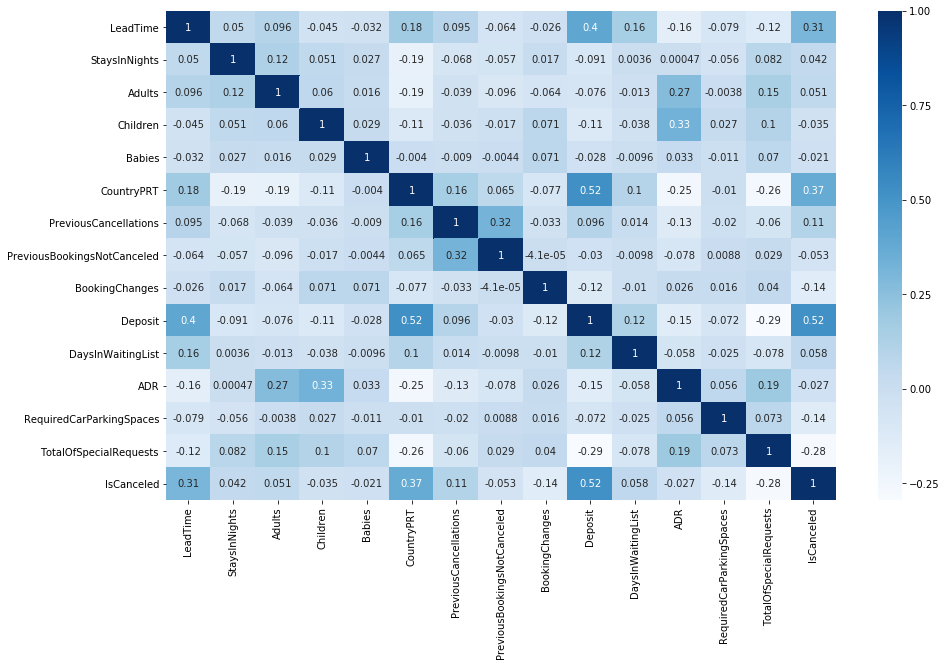

In [12]:
#Heatmap using seaborn indicating pairwise Pearson correlations of numeric variables
plt.figure(figsize=(15,9))
sns.heatmap(hotel_lisbon.corr(),cmap="Blues",annot=True)


From the boxplot, we can see significant difference in LeadTime between Canceled hotel bookings and Not Canceled hotel bookings and also from the heatmap, we see a moderate correlation (0.31) between the two variables - LeadTime and IsCanceled. Therefore, we will include LeadTime in our predictive model.


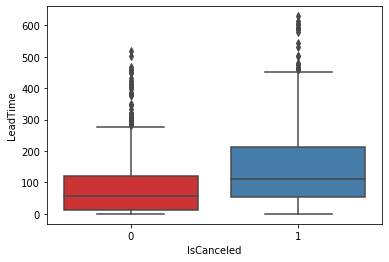

In [13]:
#Boxplot to show distribution of 'LeadTime' with respect to 'IsCanceled' category
sns.boxplot(x="IsCanceled",y="LeadTime",data=hotel_lisbon,palette="Set1") 

print('\nFrom the boxplot, we can see significant difference in LeadTime between Canceled hotel bookings and Not Canceled hotel bookings and also from the heatmap, we see a moderate correlation (0.31) between the two variables - LeadTime and IsCanceled. Therefore, we will include LeadTime in our predictive model.')


This plot shows us that the outliers/extreme values are important as they show difference in behaviour in terms of cancellation of hotel bookings and also shows us that StaysInNights is not that correlated to IsCanceled which we can also make out from the heatmap.


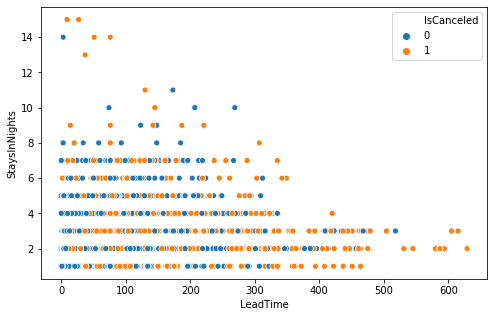

In [14]:
#Scatterplot of 'StaysInNights' and 'LeadTime' indicating behaviour of Canceled and Not Canceled Hotel Bookings
plt.figure(figsize=(8,5))
sns.scatterplot(x="LeadTime",y="StaysInNights",hue="IsCanceled",data=hotel_lisbon)

print('\nThis plot shows us that the outliers/extreme values are important as they show difference in behaviour in terms of cancellation of hotel bookings and also shows us that StaysInNights is not that correlated to IsCanceled which we can also make out from the heatmap.')

2.0    2251
1.0     558
3.0     184
Name: Adults, dtype: int64

The booking cancellation rate among the bookings with 2 adults is relatively high.


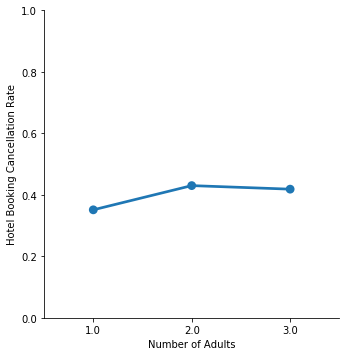

In [15]:
print(hotel_lisbon.Adults.value_counts())

#Plot to show how number of adults affects the hotel booking cancellation rate
requests=sns.catplot(x="Adults", y="IsCanceled", kind="point", ci=None, data=hotel_lisbon);
(requests.set_axis_labels("Number of Adults", "Hotel Booking Cancellation Rate")
        .set(ylim=(0, 1)))
print('\nThe booking cancellation rate among the bookings with 2 adults is relatively high.')

There is not much significant difference in Cancellation rate among the two levels. Also no correlation between Children and IsCanceled from the heatmap.


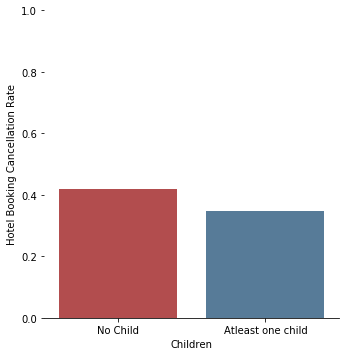

In [16]:
#Hotel Booking Cancellation Rate v Children using Seaborn 
chld=sns.catplot(x="Children",y="IsCanceled",data=hotel_lisbon,saturation=0.5,kind="bar",ci=None,aspect=1,palette="Set1")
(chld.set_axis_labels("Children", "Hotel Booking Cancellation Rate")
  .set_xticklabels(["No Child", "Atleast one child"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))

print('There is not much significant difference in Cancellation rate among the two levels. Also no correlation between Children and IsCanceled from the heatmap.')

In [17]:
print('\nWe will still include Adults and Children in our predictive model but not Babies as almost all hotel bookings in our data have babies absent.')
print('The percentage of hotel bookings with atleast one baby is {:.2f}'.format(hotel_lisbon[hotel_lisbon['Babies']==1].shape[0]/hotel_lisbon.shape[0]*100))


We will still include Adults and Children in our predictive model but not Babies as almost all hotel bookings in our data have babies absent.
The percentage of hotel bookings with atleast one baby is 0.40


From the heatmap, we see moderate to strong correlation (0.52) between IsCanceled and Deposit and moderate correlation (0.37) between IsCanceled and CountryPRT. Therefore we shall consider Deposit and CountryPRT in our predictive model.

0.0    1905
1.0    1088
Name: CountryPRT, dtype: int64


0.0    2519
1.0     474
Name: Deposit, dtype: int64




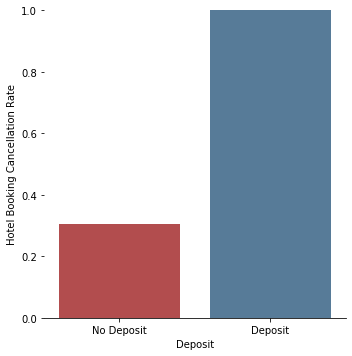

In [18]:
print('From the heatmap, we see moderate to strong correlation (0.52) between IsCanceled and Deposit and moderate correlation (0.37) between IsCanceled and CountryPRT. Therefore we shall consider Deposit and CountryPRT in our predictive model.\n')

#Frequency Distribution of CountryPRT and Deposit
for col in ['CountryPRT','Deposit']:
    print(hotel_lisbon[col].value_counts())
    print('\n')

#Hotel Booking Cancellation Rate v Deposit using Seaborn 
dep=sns.catplot(x="Deposit",y="IsCanceled",data=hotel_lisbon,saturation=0.5,kind="bar",ci=None,aspect=1,palette="Set1")
(dep.set_axis_labels("Deposit", "Hotel Booking Cancellation Rate")
  .set_xticklabels(["No Deposit", "Deposit"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))


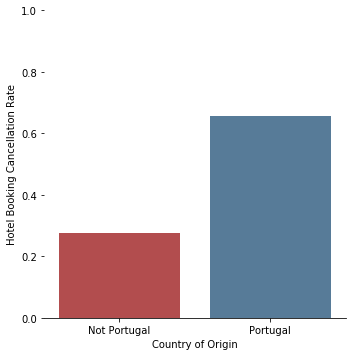

In [19]:
#Hotel Booking Cancellation Rate v CountryPRT using Seaborn 
cprt=sns.catplot(x="CountryPRT",y="IsCanceled",data=hotel_lisbon,saturation=0.5,kind="bar",ci=None,aspect=1,palette="Set1")
(cprt.set_axis_labels("Country of Origin", "Hotel Booking Cancellation Rate")
  .set_xticklabels(["Not Portugal", "Portugal"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))


Generally, customers who make more number of special requests do not cancel i.e. the hotel booking cancellation rate among them is quite low. Therefore, we will include TotalOfSpecialRequests column in our predictive model


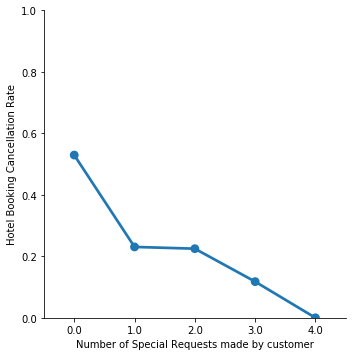

In [20]:
#Plot to show how number of special requests made by customer affects the hotel booking cancellation rate
requests=sns.catplot(x="TotalOfSpecialRequests", y="IsCanceled", kind="point", ci=None, data=hotel_lisbon);
(requests.set_axis_labels("Number of Special Requests made by customer", "Hotel Booking Cancellation Rate")
        .set(ylim=(0, 1)))
print('\nGenerally, customers who make more number of special requests do not cancel i.e. the hotel booking cancellation rate among them is quite low. Therefore, we will include TotalOfSpecialRequests column in our predictive model')


0    2912
1      81
Name: RequiredCarParkingSpaces, dtype: int64

In our data, customers who require parking space are not cancelling their hotel booking, thus making this variable an important feature to use in the predictive model.


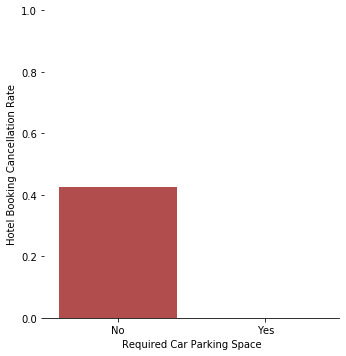

In [21]:
print(hotel_lisbon.RequiredCarParkingSpaces.value_counts())

#Hotel Booking Cancellation Rate v RequiredCarParkingSpaces using Seaborn 
carpark=sns.catplot(x="RequiredCarParkingSpaces",y="IsCanceled",data=hotel_lisbon,saturation=0.5,kind="bar",ci=None,aspect=1,palette="Set1")
(carpark.set_axis_labels("Required Car Parking Space", "Hotel Booking Cancellation Rate")
  .set_xticklabels(["No", "Yes"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))

print('\nIn our data, customers who require parking space are not cancelling their hotel booking, thus making this variable an important feature to use in the predictive model.')

In [22]:
print('We shall also include PreviousCancellations and BookingChanges in our predictive model. Therefore the numeric columns to be included in our predictive model are - LeadTime, StaysInNights, Adults, Children, CountryPRT, PreviousCancellations, BookingChanges, Deposit, RequiredCarParkingSpaces and TotalOfSpecialRequests.')

We shall also include PreviousCancellations and BookingChanges in our predictive model. Therefore the numeric columns to be included in our predictive model are - LeadTime, StaysInNights, Adults, Children, CountryPRT, PreviousCancellations, BookingChanges, Deposit, RequiredCarParkingSpaces and TotalOfSpecialRequests.


In [23]:
#Frequency Distribution of Levels of Nominal Column - Inspecting those nominal columns that could be useful for ML modeling
for col in ['ArrivalDateMonth','Meal','MarketSegment','CustomerType','AssignedRoomType']:
    print(hotel_lisbon[col].value_counts())
    print('\n')

May          491
August       335
June         299
July         295
April        274
October      260
September    255
March        210
February     186
November     137
December     137
January      114
Name: ArrivalDateMonth, dtype: int64


BB           2375
SC            383
HB            235
Name: Meal, dtype: int64


Online TA        1548
Offline TA/TO     600
Groups            509
Direct            210
Corporate         106
Complementary      15
Aviation            5
Name: MarketSegment, dtype: int64


Transient          2269
Transient-Party     612
Contract            102
Group                10
Name: CustomerType, dtype: int64


A                   2184
D                    559
F                     74
E                     66
B                     63
G                     37
K                      7
C                      3
Name: AssignedRoomType, dtype: int64




In [24]:
#Feature Engineering MarketSegment column by grouping segments 'Corporate','Complementary' and 'Aviation' as 'Other' due to their low frequency count
hotel_lisbon['MarketSegment']=['Other' if item.startswith('Corporate') or item.startswith('Complementary') or item.startswith('Aviation') else item for item in hotel_lisbon['MarketSegment']] 
print(hotel_lisbon['MarketSegment'].value_counts())

print('\n')

#Feature Engineering AssignedRoomType column by grouping room types 'G','K' and 'C'as 'Other' due to their low frequency count
hotel_lisbon['AssignedRoomType']=['Other' if item.startswith('G') or item.startswith('K') or item.startswith('C') else item for item in hotel_lisbon['AssignedRoomType']] 
print(hotel_lisbon['AssignedRoomType'].value_counts())

Online TA        1548
Offline TA/TO     600
Groups            509
Direct            210
Other             126
Name: MarketSegment, dtype: int64


A                   2184
D                    559
F                     74
E                     66
B                     63
Other                 47
Name: AssignedRoomType, dtype: int64


           MarketSegment                                                
                  Direct  Groups Offline TA/TO Online TA   Other     All
IsCanceled                                                              
0                  85.71   32.22         57.67     61.69   84.92   58.54
1                  14.29   67.78         42.33     38.31   15.08   41.46
All               100.00  100.00        100.00    100.00  100.00  100.00
                Chi-square test   results
0  Pearson Chi-square ( 4.0) =   251.8236
1                    p-value =     0.0000
2                 Cramer's V =     0.2901

We shall include MarketSegment in our predictive model.


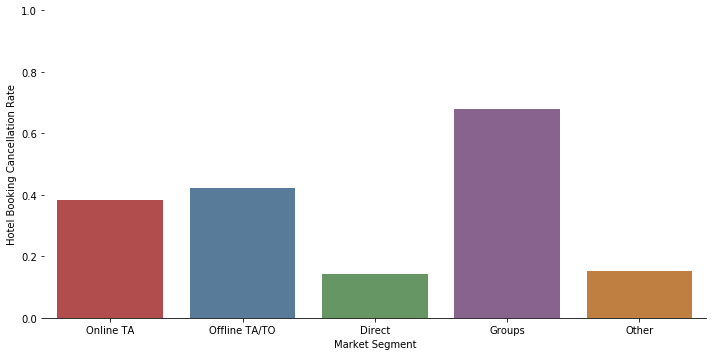

In [25]:
#Chi-square test of independence between 'IsCanceled' column and 'MarketSegment' column to give measure of association (Cramer's V) between the two variables
table1, results1 = rp.crosstab(hotel_lisbon['IsCanceled'], hotel_lisbon['MarketSegment'], prop = 'col', test = 'chi-square') 
print(table1)
print(results1)

#Hotel Booking Cancellation Rate v Market Segment using Seaborn
mkt=sns.catplot(x="MarketSegment",y="IsCanceled",data=hotel_lisbon,saturation=0.5,kind="bar",ci=None,aspect=2,palette="Set1")
(mkt.set_axis_labels("Market Segment", "Hotel Booking Cancellation Rate")
  .set_xticklabels(["Online TA", "Offline TA/TO", "Direct","Groups","Other"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))

print('\nWe shall include MarketSegment in our predictive model.')

           CustomerType                                         
               Contract  Group Transient Transient-Party     All
IsCanceled                                                      
0                  50.0   90.0     55.27           71.57   58.54
1                  50.0   10.0     44.73           28.43   41.46
All               100.0  100.0    100.00          100.00  100.00
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =   59.9608
1                    p-value =    0.0000
2                 Cramer's V =    0.1415

We shall include CustomerType in our predictive model.


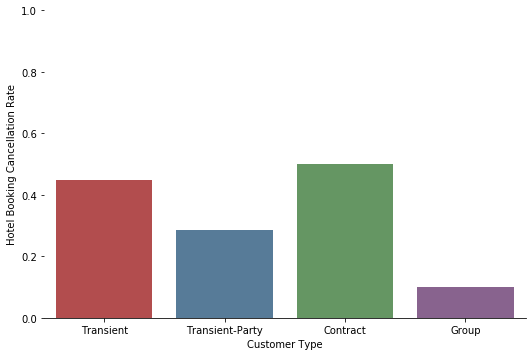

In [26]:
#Chi-square test of independence between 'IsCanceled' column and 'CustomerType' column to give measure of association (Cramer's V) between the two variables
table2, results2 = rp.crosstab(hotel_lisbon['IsCanceled'], hotel_lisbon['CustomerType'], prop = 'col', test = 'chi-square') 
print(table2)
print(results2)

#Hotel Booking Cancellation Rate v CustomerType using Seaborn
cust=sns.catplot(x="CustomerType",y="IsCanceled",data=hotel_lisbon,saturation=0.5,kind="bar",ci=None,aspect=1.5,palette="Set1")
(cust.set_axis_labels("Customer Type", "Hotel Booking Cancellation Rate")
  .set_xticklabels(["Transient", "Transient-Party", "Contract","Group"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))

print('\nWe shall include CustomerType in our predictive model.')

           AssignedRoomType                                    \
           A                B                D                  
IsCanceled                                                      
0                      53.3            82.54            69.77   
1                      46.7            17.46            30.23   
All                   100.0           100.00           100.00   

                                                              
           E                F                  Other     All  
IsCanceled                                                    
0                     78.79            70.27   89.36   58.54  
1                     21.21            29.73   10.64   41.46  
All                  100.00           100.00  100.00  100.00  
                Chi-square test   results
0  Pearson Chi-square ( 5.0) =   102.4605
1                    p-value =     0.0000
2                 Cramer's V =     0.1850

We shall include AssignedRoomType in our predictive model.


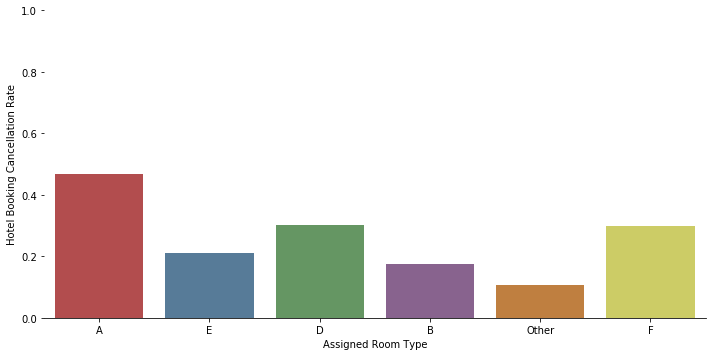

In [27]:
#Chi-square test of independence between 'IsCanceled' column and 'AssignedRoomType' column to give measure of association (Cramer's V) between the two variables
table3, results3 = rp.crosstab(hotel_lisbon['IsCanceled'], hotel_lisbon['AssignedRoomType'], prop = 'col', test = 'chi-square') 
print(table3)
print(results3)

#Hotel Booking Cancellation Rate v Assigned Room Type using Seaborn
assgn=sns.catplot(x="AssignedRoomType",y="IsCanceled",data=hotel_lisbon,saturation=0.5,kind="bar",ci=None,aspect=2,palette="Set1")
(assgn.set_axis_labels("Assigned Room Type", "Hotel Booking Cancellation Rate")
  .set_xticklabels(["A", "E", "D", "B", "Other", "F"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))

print('\nWe shall include AssignedRoomType in our predictive model.')

In [28]:
print('Therefore the object columns we will include in our predictive model are - MarketSegment,CustomerType and AssignedRoomType.')

Therefore the object columns we will include in our predictive model are - MarketSegment,CustomerType and AssignedRoomType.


# Preparing Data for ML Modeling - Selected the below features for prediction of hotel booking cancellations

> Numeric Columns: LeadTime, StaysInNights, Adults, Children, CountryPRT, PreviousCancellations, BookingChanges, Deposit, RequiredCarParkingSpaces and TotalOfSpecialRequests.

> Object Columns: MarketSegment, CustomerType, AssignedRoomType.

In [29]:
#Creating another dataframe 'hotel_lisbon_model' which is our feature data consisting of dependent and independent variables that we will be using for ML modeling
hotel_lisbon_model = hotel_lisbon[['IsCanceled','LeadTime','StaysInNights','Adults','Children','CountryPRT','PreviousCancellations','BookingChanges','Deposit','RequiredCarParkingSpaces','TotalOfSpecialRequests','MarketSegment','CustomerType', 'AssignedRoomType']]

#OneHotEncoding Categorical Variables using get_dummies for ML modeling
hotel_lisbon_model = pd.get_dummies(hotel_lisbon_model, prefix_sep='_', drop_first=True)
hotel_lisbon_model.head()

,IsCanceled,LeadTime,StaysInNights,Adults,Children,CountryPRT,PreviousCancellations,BookingChanges,Deposit,RequiredCarParkingSpaces,...,MarketSegment_Online TA,MarketSegment_Other,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,AssignedRoomType_B,AssignedRoomType_D,AssignedRoomType_E,AssignedRoomType_F,AssignedRoomType_Other
0,0,192.0,4.0,2.0,0,0.0,0.0,2.0,0.0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,23.0,1.0,3.0,0,0.0,0.0,1.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,17.0,2.0,3.0,0,0.0,0.0,0.0,0.0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,19.0,2.0,1.0,0,0.0,0.0,0.0,0.0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,4.0,2.0,2.0,0,0.0,0.0,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0


In [30]:
X = hotel_lisbon_model.drop(['IsCanceled'],axis=1)
X.head()

,LeadTime,StaysInNights,Adults,Children,CountryPRT,PreviousCancellations,BookingChanges,Deposit,RequiredCarParkingSpaces,TotalOfSpecialRequests,...,MarketSegment_Online TA,MarketSegment_Other,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,AssignedRoomType_B,AssignedRoomType_D,AssignedRoomType_E,AssignedRoomType_F,AssignedRoomType_Other
0,192.0,4.0,2.0,0,0.0,0.0,2.0,0.0,0,2.0,...,1,0,0,1,0,0,0,0,0,0
1,23.0,1.0,3.0,0,0.0,0.0,1.0,0.0,0,1.0,...,0,0,0,1,0,0,0,0,0,0
2,17.0,2.0,3.0,0,0.0,0.0,0.0,0.0,0,0.0,...,1,0,0,1,0,0,0,0,0,0
3,19.0,2.0,1.0,0,0.0,0.0,0.0,0.0,0,0.0,...,1,0,0,1,0,0,0,0,0,0
4,4.0,2.0,2.0,0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,1,0,0,0,1,0,0


In [31]:
y = hotel_lisbon['IsCanceled']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: IsCanceled, dtype: int64

In [32]:
#Scaling is very important as it brings all the features on a similar scale and helps algorithms perform better or converge faster
from sklearn.preprocessing import MinMaxScaler
print('We will be using MinMaxScaler because we do not want our outliers to have reduced influence due to normalization.')

We will be using MinMaxScaler because we do not want our outliers to have reduced influence due to normalization.


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

X_train

array([[0.26341463, 0.        , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.24065041, 0.14285714, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.39837398, 0.35714286, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.65853659, 0.07142857, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.00813008, 0.07142857, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.23739837, 0.21428571, 0.5       , ..., 0.        , 0.        ,
        0.        ]])

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#For model evaluation and development
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


# Voting Classifier

In [36]:
param_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1','l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=10, return_train_score=True, n_jobs= -1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.6f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.790931


### Best parameters for decision tree classifier

In [37]:
param_grid = {'max_depth': np.arange(1, 10)}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=10, return_train_score=True, verbose=True, n_jobs= -1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.6f}".format(grid_search.best_score_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'max_depth': 7}
Best cross-validation score: 0.791408


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.6s finished


In [38]:
param_grid = {'n_neighbors': np.arange(1, 25)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.6f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.789499


# Hard Voting 

In [39]:
log_clf = LogisticRegression(penalty= 'l1', C= 10, solver = 'liblinear')
log_clf.fit(X_train, y_train)
dt_clf = DecisionTreeClassifier(max_depth= 7)
dt_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt_clf', dt_clf), ('knn_clf', knn_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, dt_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred).round(3))

LogisticRegression 0.776
DecisionTreeClassifier 0.772
KNeighborsClassifier 0.763
VotingClassifier 0.78


# Soft Voting


In [40]:
log_clf = LogisticRegression(penalty= 'l1', C= 10, solver = 'liblinear')
log_clf.fit(X_train, y_train)
dt_clf = DecisionTreeClassifier(max_depth= 7)
dt_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt_clf', dt_clf), ('knn_clf', knn_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, dt_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred).round(3))

LogisticRegression 0.776
DecisionTreeClassifier 0.772
KNeighborsClassifier 0.763
VotingClassifier 0.787


# Bagging


#### Model 1 - Random Forest


__Best parameter for Random Forest Classifier__

In [41]:
param_grid = {'n_estimators': [50,100,200,500],
              'max_depth': np.arange(1, 10)}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=10, return_train_score=True, n_jobs= -1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 8, 'n_estimators': 500}
Best cross-validation score: 0.81


#### Random Forest Classifier model with the best parameters

In [42]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_depth = 8, bootstrap=True, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print('Score after Bagging on Random Forest Classifier on Train Set: {:.2f}'.format(rnd_clf.score(X_train, y_train)))
print('Score after Bagging on Random Forest Classifier on Test Set: {:.2f}'.format(rnd_clf.score(X_test, y_test)))

Score after Bagging on Random Forest Classifier on Train Set: 0.83
Score after Bagging on Random Forest Classifier on Test Set: 0.78


#### Accuracy of the Model

In [43]:
print("Accuracy of the Classifier : ", accuracy_score(y_test, y_pred_rf).round(4))

Accuracy of the Classifier :  0.7829


#### Confusion Matrix

In [44]:
pred_test = rnd_clf.predict(X_test)
pred_train = rnd_clf.predict(X_train)
confusion_test = confusion_matrix(y_test, pred_test)
confusion_train = confusion_matrix(y_train, pred_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[495  43]
 [152 208]]
Confusion matrix for train:
[[1148   66]
 [ 292  589]]


#### Classification Report


In [45]:
print(classification_report(y_test, pred_test, target_names=["IsNotCanceled 0", "IsCanceled 1"]))

                 precision    recall  f1-score   support

IsNotCanceled 0       0.77      0.92      0.84       538
   IsCanceled 1       0.83      0.58      0.68       360

       accuracy                           0.78       898
      macro avg       0.80      0.75      0.76       898
   weighted avg       0.79      0.78      0.77       898



#### Showing Feature Importance 

In [53]:
feat_importances = pd.Series(rnd_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(5)

Deposit                   0.268016
CountryPRT                0.135232
LeadTime                  0.134598
TotalOfSpecialRequests    0.107971
PreviousCancellations     0.060329
dtype: float64

### Model 2 - Decision Tree Classifier

### Best parameters for Bagging Classifier using Grid Search

In [54]:
param_grid = {'n_estimators': [50,100,200,500],
              'max_samples': [50,100,200,400]}

grid_search = GridSearchCV(BaggingClassifier(random_state = 0), param_grid, cv=10, return_train_score=True, n_jobs= -1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 400, 'n_estimators': 50}
Best cross-validation score: 0.81


#### Best parameters for Decision Tree Classifier

In [55]:
param_grid = {'max_depth': np.arange(1, 10)}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=10, return_train_score=True, n_jobs= -1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 7}
Best cross-validation score: 0.79


##### Rebuilding the model with best parameters

In [56]:
dt_clf = DecisionTreeClassifier(max_depth = 7, random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=50, max_samples=400, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Score after Bagging on Decision Tree Classifier on Train Set: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Score after Bagging on Decision Tree Classifier on Test Set: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Score after Bagging on Decision Tree Classifier on Train Set: 0.83
Score after Bagging on Decision Tree Classifier on Test Set: 0.79


###### Accuracy of the Model - Bagging classifier with Decision Tree Classifier

In [57]:
print("Accuracy of the Classifier : ", accuracy_score(y_test, y_pred).round(4))

Accuracy of the Classifier :  0.7851


##### Confusion Matrix

In [58]:
pred_test = bag_clf.predict(X_test)
pred_train = bag_clf.predict(X_train)
confusion_test = confusion_matrix(y_test, pred_test)
confusion_train = confusion_matrix(y_train, pred_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[472  66]
 [127 233]]
Confusion matrix for train:
[[1102  112]
 [ 252  629]]


##### Classification report for the model 


In [59]:
print(classification_report(y_test, pred_test, target_names=["IsCanceled 0", "IsCanceled 1"]))

              precision    recall  f1-score   support

IsCanceled 0       0.79      0.88      0.83       538
IsCanceled 1       0.78      0.65      0.71       360

    accuracy                           0.79       898
   macro avg       0.78      0.76      0.77       898
weighted avg       0.78      0.79      0.78       898



# Pasting

### Model 1 - Decision Tree 

#### Best parameter for Bagging Classifier

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
param_grid = {'n_estimators': [50,100,200,500],
              'max_samples': [50,100,200,400]}

grid_search = GridSearchCV(BaggingClassifier(random_state = 0), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 400, 'n_estimators': 50}
Best cross-validation score: 0.81


### Best parameter for Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1, 10)}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=10, return_train_score=True, verbose=True, n_jobs= -1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished


Best parameters: {'max_depth': 7}
Best cross-validation score: 0.79


#### Rebuilding the model with best parameters


In [62]:
dt_clf = DecisionTreeClassifier(max_depth = 7, random_state=0)
past_clf = BaggingClassifier(dt_clf, n_estimators=50, max_samples=400, bootstrap=False, n_jobs=-1, random_state=0)

past_clf.fit(X_train, y_train)
y_pred = past_clf.predict(X_test)

print('Score after Pasting on Decision Tree Classifier on Train Set: {:.2f}'.format(past_clf.score(X_train, y_train)))
print('Score after Pasting on Decision Tree Classifier on Test Set: {:.2f}'.format(past_clf.score(X_test, y_test)))

Score after Pasting on Decision Tree Classifier on Train Set: 0.83
Score after Pasting on Decision Tree Classifier on Test Set: 0.79


#### Accuracy of the model


In [63]:
print("Accuracy  of the model : ", accuracy_score(y_test, y_pred).round(4))

Accuracy  of the model :  0.7862


#### Confusion Matrix

In [64]:
pred_test = past_clf.predict(X_test)
pred_train = past_clf.predict(X_train)
confusion_test = confusion_matrix(y_test, pred_test)
confusion_train = confusion_matrix(y_train, pred_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[459  79]
 [113 247]]
Confusion matrix for train:
[[1079  135]
 [ 229  652]]


#### Classification Report

In [65]:
print(classification_report(y_test, pred_test, target_names=["IsCanceled 0", "IsCanceled 1"]))

              precision    recall  f1-score   support

IsCanceled 0       0.80      0.85      0.83       538
IsCanceled 1       0.76      0.69      0.72       360

    accuracy                           0.79       898
   macro avg       0.78      0.77      0.77       898
weighted avg       0.78      0.79      0.78       898



## Model 2 - Random Forest


#### Best parameter for Random forest classifier

In [66]:
param_grid = {'n_estimators': [50,100,200,500],
              'max_depth': np.arange(1, 10)}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=10, return_train_score=True, verbose=True, n_jobs= -1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   55.0s finished


Best parameters: {'max_depth': 8, 'n_estimators': 500}
Best cross-validation score: 0.81


#### Building the RandomForest Classifier model with the best parameters


In [67]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_depth = 8, max_leaf_nodes=16, bootstrap=False, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print('Score after Pasting on Random Forest Classifier on Train Set: {:.2f}'.format(rnd_clf.score(X_train, y_train)))
print('Score after Pasting on Random Forest Classifier on Test Set: {:.2f}'.format(rnd_clf.score(X_test, y_test)))

Score after Pasting on Random Forest Classifier on Train Set: 0.81
Score after Pasting on Random Forest Classifier on Test Set: 0.77


#### Accuracy


In [68]:
print("Accuracy of the model : ", accuracy_score(y_test, y_pred).round(4))

Accuracy of the model :  0.7862


#### Confusion Matrix

In [69]:
pred_test = rnd_clf.predict(X_test)
pred_train = rnd_clf.predict(X_train)
confusion_test = confusion_matrix(y_test, pred_test)
confusion_train = confusion_matrix(y_train, pred_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[509  29]
 [175 185]]
Confusion matrix for train:
[[1184   30]
 [ 378  503]]


##### Classification report

In [70]:
print(classification_report(y_test, pred_test, target_names=["IsCanceled 0", "Iscanceled 1"]))

              precision    recall  f1-score   support

IsCanceled 0       0.74      0.95      0.83       538
Iscanceled 1       0.86      0.51      0.64       360

    accuracy                           0.77       898
   macro avg       0.80      0.73      0.74       898
weighted avg       0.79      0.77      0.76       898



#### Showing feature importance 





In [71]:
feat_importances = pd.Series(rnd_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(5)

Deposit                   0.314859
CountryPRT                0.151019
TotalOfSpecialRequests    0.117947
LeadTime                  0.108807
PreviousCancellations     0.061835
dtype: float64

## AdaBoost Boosting

### Model 1 - Logistic Regression with AdaBoost


#### Grid search to find best parameters for Adaboost boosting for logistic regression 

In [72]:
param_grid = {'n_estimators': [50,100,200,500],
              'learning_rate': [.01, .05, .1, 1]}

grid_search_logit = GridSearchCV(AdaBoostClassifier(LogisticRegression(),algorithm="SAMME.R",random_state = 0), param_grid, cv=10, return_train_score=True, verbose=True, n_jobs= -1)
grid_search_logit.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_logit.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_logit.best_score_))

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   54.3s finished


Best parameters: {'learning_rate': 1, 'n_estimators': 200}
Best cross-validation score: 0.78


#### Applying logistic Regression on the data

In [73]:
lclf = LogisticRegression()
lclf.fit(X_train,y_train)
y_pred = lclf.predict(X_test)
from  sklearn.metrics import accuracy_score
print("Accuracy for logistic regression model :", accuracy_score(y_test, y_pred).round(4))

Accuracy for logistic regression model : 0.7706


#### Applying adaboosting on Logistic Regression

---



In [74]:
ada_clf1 = AdaBoostClassifier(LogisticRegression(), n_estimators= 200, algorithm="SAMME.R", learning_rate=1, random_state=0)
ada_clf1.fit(X_train, y_train)
y_pred = ada_clf1.predict(X_test)
from  sklearn.metrics import accuracy_score
print("Accuracy after applying adaboost on logistic regression model:",accuracy_score(y_test, y_pred).round(4))

Accuracy after applying adaboost on logistic regression model: 0.7606


### Model 2 - Decision Tree Classifier with AdaBoosting

##### Finding best parameters for adaboost boosting for Decision Tree Classifier

In [75]:
param_grid = {'n_estimators': [50,100,200,500],
              'learning_rate': [.01, .05, .1, 1]}

grid_search_ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(),random_state = 0), param_grid, cv=10, return_train_score=True, verbose=True, n_jobs=-1)
grid_search_ada.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_ada.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ada.best_score_))

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.4min finished


Best parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best cross-validation score: 0.77


###### Decision Tree on the dataset before adaboost boosting


In [76]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

print("Accuracy of the decision tree classifier ", accuracy_score(y_test, y_pred).round(4))

Accuracy of the decision tree classifier  0.7339


###### Applying AdaBoost Boosting on the decision tree classifier


In [77]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50, algorithm="SAMME.R", learning_rate=0.01, random_state=0)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
from  sklearn.metrics import accuracy_score
print("Accuracy of the decision tree classifier after adaboost boosting",accuracy_score(y_test, y_pred).round(4))

Accuracy of the decision tree classifier after adaboost boosting 0.7661


<b>Observation - We can see that adaboost boosting has improved the accuracy of the decision tree classifer.<b>

## Gradient Boosting


#### Finding best parameters for gradient boosting

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
param_grid = {'n_estimators': [50,100,200,500],
              'learning_rate': [.01, .05, .1, 1], 'max_depth': np.arange(1, 10)}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state = 0), param_grid, cv=10, return_train_score=True, n_jobs=-1, verbose=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 586 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  9.0min finished


Best parameters: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 50}
Best cross-validation score: 0.81


#### Building the gradient boosting model with best parameters

In [80]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.05, max_depth = 6, n_estimators=50)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)

#### Accuracy of the Model

In [81]:
print("Accuracy of the model after gradient boosting",accuracy_score(y_test, y_pred).round(4))

Accuracy of the model after gradient boosting 0.7862


#### Confusion matrix

In [82]:
pred_test = gbrt.predict(X_test)
pred_train = gbrt.predict(X_train)
confusion_test = confusion_matrix(y_test, pred_test)
confusion_train = confusion_matrix(y_train, pred_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[467  71]
 [121 239]]
Confusion matrix for train:
[[1099  115]
 [ 216  665]]


## PCA (Principal Component Analysis) - Dimensionality Reduction Technique

In [83]:
from sklearn.decomposition import PCA
pca_classification = PCA(n_components = .95, random_state = 0)
X_train_class = pca_classification.fit_transform(X_train)
X_test_class = pca_classification.transform(X_test)

#### Number of components after PCA

In [84]:
pca_classification.n_components_

14

### 1. Logistic Regression with Principal Component


#### Finding best parameters for the model

In [85]:
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1','l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid_svm, cv=5, return_train_score=True)
grid_search.fit(X_train_class, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.6f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.785203


#### Building the model with best parameters

In [86]:
lg = LogisticRegression(C=10,penalty='l1').fit(X_train_class, y_train)
print('Train score on best parameters for Logistic Regression model {:.3f}'.format(lg.score(X_train_class,y_train)))
print('Test score on best parameters for Logistic Regression model {:.3f}'.format(lg.score(X_test_class,y_test)))

Train score on best parameters for Logistic Regression model 0.789
Test score on best parameters for Logistic Regression model 0.761


#### Confusion Matrix

In [87]:
pred_logreg_test = lg.predict(X_test_class)
pred_logreg_train = lg.predict(X_train_class)
confusion_test = confusion_matrix(y_test, pred_logreg_test)
confusion_train = confusion_matrix(y_train, pred_logreg_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[462  76]
 [139 221]]
Confusion matrix for train:
[[1090  124]
 [ 319  562]]


#### Classification Report 

In [88]:
print(classification_report(y_test, pred_logreg_test, target_names=["IsCanceled 0", "IsCanceled 1"]))

              precision    recall  f1-score   support

IsCanceled 0       0.77      0.86      0.81       538
IsCanceled 1       0.74      0.61      0.67       360

    accuracy                           0.76       898
   macro avg       0.76      0.74      0.74       898
weighted avg       0.76      0.76      0.76       898



### 2. KNN Classifier with Principal Component

#### Finding best parameters for the model

In [89]:
param_grid = {'n_neighbors': range(1,10)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True, verbose = True)
grid_search.fit(X_train_class, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters: {'n_neighbors': 8}
Best cross-validation score: 0.78


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    5.6s finished


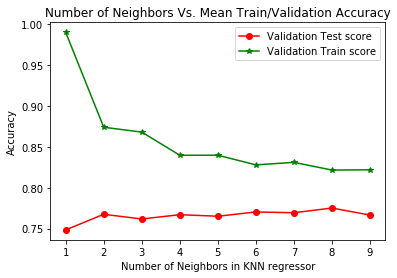

In [90]:
results = pd.DataFrame(grid_search.cv_results_)
plt.plot(results['param_n_neighbors'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_n_neighbors'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Number of Neighbors Vs. Mean Train/Validation Accuracy')
plt.xlabel('Number of Neighbors in KNN regressor')
plt.ylabel('Accuracy')
plt.legend()


In [91]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_class, y_train)
print('Train score on best parameters {}'.format(knn.score(X_train_class,y_train)))
print('Test score on best parameters {}'.format(knn.score(X_test_class,y_test)))

Train score on best parameters 0.8214797136038187
Test score on best parameters 0.7628062360801782


### 3. Support Vector Machine Classifiers

### 3.1 Linear SVC with Principal Component

#### Finding best parameters using gridsearch for Linear SVC and then finding test score using tuned model

In [94]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

linearsvc = LinearSVC()
param_grid = {'C':np.arange(0.01,1000,10),'random_state':[0]} #C - Regularization Parameter

clf = GridSearchCV(linearsvc,param_grid,cv=5)
clf.fit(X_train_class, y_train)

print("Best parameters: {}".format(clf.best_params_))
print("Best cross-validation score: {:.2f}".format(clf.best_score_))


Best parameters: {'C': 40.01, 'random_state': 0}
Best cross-validation score: 0.78


In [95]:
linsvc = LinearSVC(C=40.01,random_state=0)
linsvc.fit(X_train_class, y_train)
print('Train score on best parameters {}'.format(linsvc.score(X_train_class,y_train)))
print('Test score on best parameters {}'.format(linsvc.score(X_test_class,y_test)))

Train score on best parameters 0.7899761336515513
Test score on best parameters 0.7661469933184856


### 3.2 Kernelized SVC with Principal Component

### Finding best parameters using gridsearch for Kernelized SVC and then finding test score using tuned model

In [96]:
kernelizedsvc = SVC()

#Hyper Parameters Set
param_grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf','poly']}]

kerclf = GridSearchCV(kernelizedsvc,param_grid,cv=5)
kerclf.fit(X_train_class, y_train)

print("Best parameters: {}".format(kerclf.best_params_))
print("Best cross-validation score: {:.2f}".format(kerclf.best_score_))

Best parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.79


In [97]:
kernsvc = SVC(C=1000,gamma=0.001,kernel='rbf',random_state=0)
kernsvc.fit(X_train_class, y_train)
print('Train score on best parameters {}'.format(kernsvc.score(X_train_class,y_train)))
print('Test score on best parameters {}'.format(kernsvc.score(X_test_class,y_test)))

Train score on best parameters 0.7961813842482101
Test score on best parameters 0.767260579064588


### 4. Decision Tree Classifier with Principal Component


#### Finding best parameters for the model using gridsearch

In [92]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1, 10),'random_state':[0]}
grid_search.fit(X_train_class, y_train)
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, return_train_score=True, n_jobs = -1, verbose = True)
grid_search.fit(X_train_class, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s


Best parameters: {'max_depth': 7, 'random_state': 0}
Best cross-validation score: 0.77


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    9.7s finished


In [93]:
clftree = DecisionTreeClassifier(max_depth=7,random_state=0)
clftree.fit(X_train_class, y_train)
print('Train score on best parameters {}'.format(clftree.score(X_train_class,y_train)))
print('Test score on best parameters {}'.format(clftree.score(X_test_class,y_test)))

Train score on best parameters 0.809546539379475
Test score on best parameters 0.7538975501113586


## Comparing results of models without PCA with models after PCA

In [101]:
pca = ['Before PCA','After PCA']
accuracy = ['Test Accuracy','Test Accuracy']
hier_index = list(zip(pca,accuracy))
hier_index = pd.MultiIndex.from_tuples(hier_index)

data_class = np.array([(0.776,0.746,0.769,0.775,0.758),
                     (0.761,0.762,0.766,0.767,0.753)])

df = pd.DataFrame(data_class,index=hier_index,columns=['Logistic Regression','KNN Classification','Linear SVC','Kernelized SVC','Decision Tree'])
df

,,Logistic Regression,KNN Classification,Linear SVC,Kernelized SVC,Decision Tree
Before PCA,Test Accuracy,0.776,0.746,0.769,0.775,0.758
After PCA,Test Accuracy,0.761,0.762,0.766,0.767,0.753


### The test accuracy has improved for KNN Classification model after PCA, however it hasn't improved for the rest of the models but there is not much difference in the  test accuracy for the models before PCA and after PCA and PCA has helped us reduce the dimensionality which is very important if you want to avoid computational problems. So in that sense, it gives us good enough results even after dimensionality reduction technique.

## Neural Networks - Classification


In [114]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Vivek Rao\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-114-7ddb2790fa09>", line 2, in <module>
    from keras.models import Sequential
  File "C:\Users\Vivek Rao\Anaconda3\lib\site-packages\keras\__init__.py", line 3, in <module>
    from . import utils
  File "C:\Users\Vivek Rao\Anaconda3\lib\site-packages\keras\utils\__init__.py", line 6, in <module>
    from . import conv_utils
  File "C:\Users\Vivek Rao\Anaconda3\lib\site-packages\keras\utils\conv_utils.py", line 9, in <module>
    from .. import backend as K
  File "C:\Users\Vivek Rao\Anaconda3\lib\site-packages\keras\backend\__init__.py", line 1, in <module>
    from .load_backend import epsilon
  File "C:\Users\Vivek Rao\Anaconda3\lib\site-packages\keras\backend\load_backend.py", line 90, in <module>
    from .tensorflow_backend import *
  File "C:\Users\Vivek R

TypeError: expected bytes, Descriptor found

In [ ]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(17, input_dim=22, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

##### Setting the seed 

In [ ]:
seed = 10
np.random.seed(10)

__Using GridSearch to find out best parmeters__

In [ ]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5, n_jobs=-1, verbose= True)

grid_search_result = grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

#### Creating Model

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=23, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### Compiling Model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Fitting the Model

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=20)

#### Evaluating the Model and calculating the accuracy

In [ ]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
y_predict = model.predict(X_test)
y_predict